In [0]:
import numpy as np 
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/My Drive/fake_job_postings.csv', engine='python',error_bad_lines=False)
data

Skipping line 5697: unexpected end of data


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,5691,Field sales executive,"GB, ERY, Wakefield",Sales,25000-30000,NaN,Job Title: Field Sales Executive (Copier/Print...,NaN,NaN,0,0,1,Full-time,Not Applicable,Unspecified,Printing,Sales,0
5691,5692,Network Marketing,"US, DE,",NaN,7200-1380000,NaN,"Are you looking to make anywhere from 600-115,...","An ambition to succeed, A desire to be the bes...","Residual Income, Travel dollars, Car Dollars, ...",0,0,0,Other,Not Applicable,Unspecified,Market Research,Marketing,1
5692,5693,OUD: Stage Marketing 2.,"NL, UT, Amersfoort",NaN,NaN,SummaView is een jong bedrijf uit Amersfoort d...,SummaView is opzoek naar een gemotiveerde stag...,Je volgt een HBO- of WO-opleiding richting Mar...,Als stagair(e) Marketing bieden wij jou:Een ui...,0,1,0,NaN,Internship,NaN,Marketing and Advertising,Marketing,0
5693,5694,Mobile Developer,"GR, I, Athens",NaN,NaN,In Discoveroom we have a grand vision: to cha...,Discoveroom is a startup that aims to solve th...,Three years experience developing on Android. ...,We offer a competitive package that combines s...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,NaN,NaN,0


In [6]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000
mean,2848.000000,0.044074,0.777700,0.528007,0.041615
std,1644.149223,0.205277,0.415828,0.499259,0.199726
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1424.500000,0.000000,1.000000,0.000000,0.000000
50%,2848.000000,0.000000,1.000000,1.000000,0.000000
75%,4271.500000,0.000000,1.000000,1.000000,0.000000
max,5695.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

In [0]:
data.columns
df=data[['title', 'location', 'department',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent']]

In [10]:
df['location'] = le.fit_transform(df['location'])

NameError: ignored

In [11]:
df['location']

0          US, NY, New York
1            NZ, , Auckland
2             US, IA, Wever
3        US, DC, Washington
4        US, FL, Fort Worth
               ...         
5690     GB, ERY, Wakefield
5691               US, DE, 
5692     NL, UT, Amersfoort
5693          GR, I, Athens
5694    GB, LND, Shoreditch
Name: location, Length: 5695, dtype: object

In [0]:

#First converting all features to numeric
from sklearn import tree, preprocessing
le = preprocessing.LabelEncoder()
# df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])

In [13]:
df=df.replace(r'^\s+$', np.nan, regex=True)
for c in df.columns:
    df[c] = df[c].fillna("")
for i in df.columns:
  print(i)
  df[i]=le.fit_transform(df[i])

title
location
department
telecommuting
has_company_logo
has_questions
employment_type
required_experience
required_education
industry
function
fraudulent


In [14]:
df

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,2276,1324,392,0,1,0,3,5,0,0,23,0
1,826,577,589,0,1,0,2,7,0,71,8,0
2,681,989,0,0,1,0,0,0,0,0,0,0
3,101,904,535,0,1,0,2,6,2,22,32,0
4,366,930,0,0,1,1,2,6,2,48,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5690,1328,276,535,0,0,1,2,7,10,91,32,0
5691,2416,908,0,0,0,0,3,7,10,70,23,1
5692,2450,570,0,0,1,0,0,5,0,71,23,0
5693,2370,437,0,0,1,1,2,6,2,0,0,0


In [0]:
#function to compare the different algorihths based on recall of model 
def compareAlgos(model_results):
  fig = plt.figure(figsize=(11,6))
  fig.suptitle('Algorithm Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot([modelresult for name,modelresult in model_results.items()])
  ax.set_xticklabels([name for name,modelresult in model_results.items()])
  plt.show()

#writing a functional api layer which takes models , trains and tests and plots comparision of those models on a graph 
def fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test):
  accuracy={}
  specificity={}
  sensitivity={}
  #models_dict holds name and its function , like {'LR':LogsticRegression()}
  for name,model in models_dict.items():
    try:
      #fitting model on the train data
      model.fit(X_train,y_train)
      #predicting model on X_test 
      y_pred=model.predict(X_test)
      print('*'*100)
      print('Model:',name)
      #printing Confusion matrix an dAccuracy of each model
      print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
      print("Accuracy : ",accuracy_score(y_test,y_pred)*100)

      #mainitaing a dictionary of results of accuracy of each model to use it to plot in one systyem
      accuracy[name]=accuracy_score(y_test,y_pred)*100
      cm=confusion_matrix(y_test, y_pred)
      sensitivity[name] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
      specificity[name] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
      print("Classificarion Report : ")
      print(classification_report(y_test, y_pred))
    except ValueError:
      print(name,'failed')
  
  #converting dictionaries to dataframes to have them handy
  accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
  sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
  specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
  # print(accuracy)
  accuracy.columns=['model_name','accuracy']
  sensitivity.columns=['model_name','sensitivity']
  specificity.columns=['model_name','specificity']
  
  #plotting accuracy,sensitivity,specificity of each model
  plt.figure(figsize=(16, 6))
  ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
  ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
  ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
  ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
  plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

In [0]:
X = df.drop(['fraudulent'], axis=1).values
Y = df['fraudulent'].values

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
models_dict={}
models_dict['LogisticRegression']        = LogisticRegression()
models_dict['NB']        = GaussianNB()
models_dict['KNN']       = KNeighborsClassifier()
models_dict['XGB']       = XGBClassifier()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


****************************************************************************************************
Model: LogisticRegression
Confusion Matrix:  [[1094    0]
 [  45    0]]
Accuracy :  96.04916593503073
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1094
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1139
   macro avg       0.48      0.50      0.49      1139
weighted avg       0.92      0.96      0.94      1139

****************************************************************************************************
Model: NB
Confusion Matrix:  [[1060   34]
 [  42    3]]
Accuracy :  93.32748024582968
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1094
           1       0.08      0.07      0.07        45

    accuracy                           0.93      1139
   macro avg   

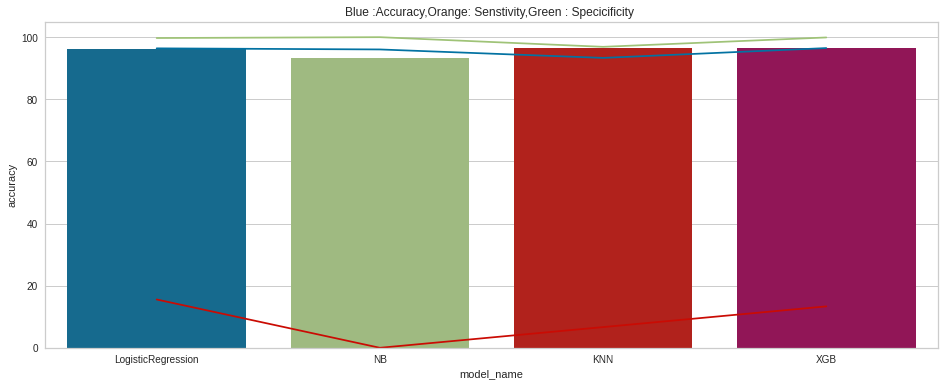

In [23]:
fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test)